## **Actividad Semanal -- 7 Regresiones y K means**
### **Maestría en Inteligencia Artificial Aplicada**
### **Curso: Ciencia y analítica de datos**
### Tecnológico de Monterrey
### Prof PhD. María de la Paz Rico
### **Nombre del estudiante: Matthias Sibrian Illescas**
### **Matrícula: A01794249**
### **09 de noviembre de 2022**



### **Ejercicio 1. Costo en la industria de manufactura.**

In [58]:
#todos los imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import  OneHotEncoder,MinMaxScaler,StandardScaler
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs


**1. Divide los datos del costo de manufactura. Utiliza la función train_test_split (viene el ejemplo al final del notebook).**

In [59]:
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/EconomiesOfScale.csv') #se importa los datos
df.info() #se da un vistazo de los tipos de datos y si tiene nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Number of Units     1000 non-null   float64
 1   Manufacturing Cost  1000 non-null   float64
dtypes: float64(2)
memory usage: 15.8 KB


El dataset no contiene datos nulos en ninguna de sus columnas.

In [60]:
from sklearn.model_selection import train_test_split
X = df.drop(['Manufacturing Cost'], axis=1) #la variable es el número de unidades
y = df['Manufacturing Cost'] #las etiquetas para el modelo será el precio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 101)
#división en entrenamiento y prueba, con 10% hacia prueba

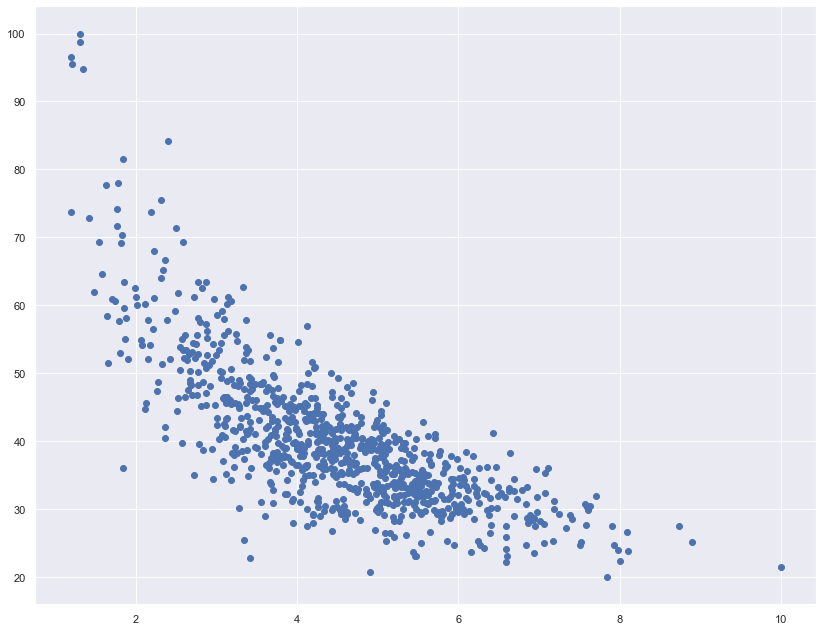

In [61]:
plt.scatter(X_train, y_train)

**2. Realiza la regresión lineal: modelo generado (ecuación), su visualización, sus errores y r cuadrada.**

Y = -5.988826991706113X + 66.83650741226988


c:\Users\matth\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Error medio Absoluto (MAE): 5.013587781954963
Root Mean Squared Error: 7.108963321847682
r2_score 0.6116251549562579


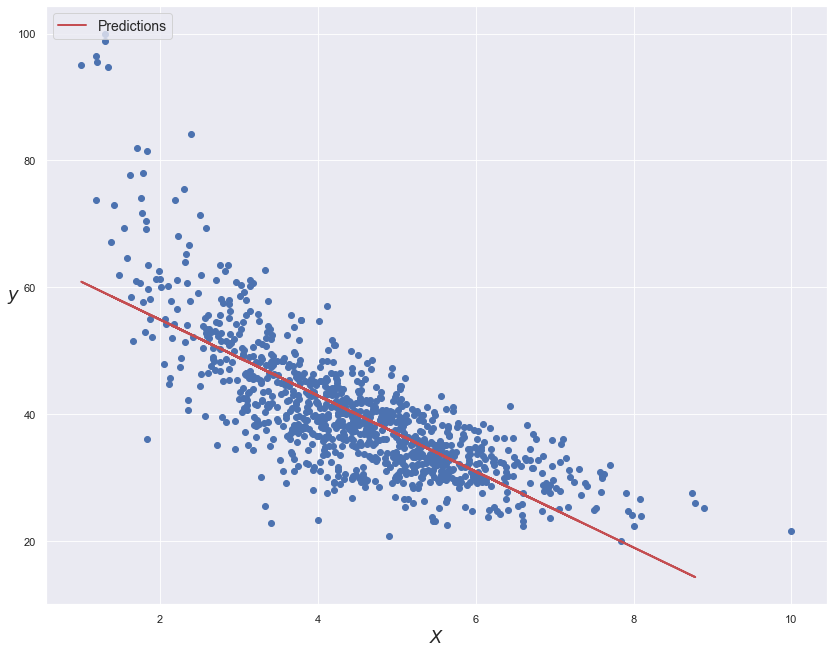

In [62]:
linear_reg = LinearRegression(fit_intercept=True) #modelo con intercepto incluido
linear_reg.fit(X_train, y_train) #se ajusta a los datos de entrenamiento
print('Y = '+ str(linear_reg.coef_[0])+'X + ' + str(linear_reg.intercept_)) #modelo y= mx + b
y_predicted_original = linear_reg.predict(np.array(X_test['Number of Units']).reshape(-1, 1)) #se predice con la data de validación
plt.scatter(X['Number of Units'], y) #se visualiza la data original completa
plt.plot(X_test['Number of Units'], y_predicted_original, "r-", linewidth=2, label="Predictions") #se incluyen 
#los datos predecidos de prueba
plt.xlabel("$X$", fontsize=18) #label de X
plt.ylabel("$y$", rotation=0, fontsize=18) #label de y
plt.legend(loc="upper left", fontsize=14) #colocar leyenda
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_test, y_predicted_original)) #Error medio
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predicted_original))) #RMSE para regresiones lineales
print('r2_score',r2_score(y_test, y_predicted_original)) #R2 regresiones lineales

**3.Realiza la regresión polinomial completa, tu modelo generado (ecuación), su visualización, sus errores y r cuadrada.**

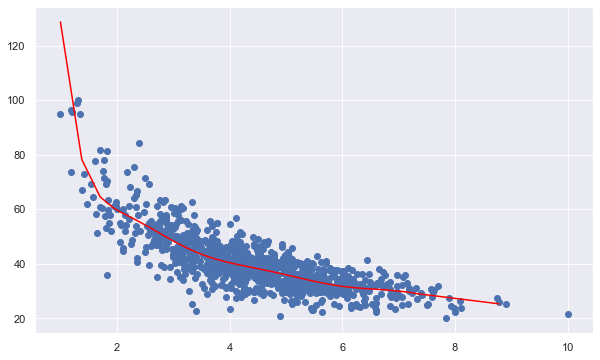

Ecuación: 
-2271.0555914560864X + 2197.754784664122 X^2 + -1191.167297040869 X^3 + 
396.50531025724143 X^4 + -84.1964533500926 X^5 + 11.43772775532292 X^6 + 
-0.9613534705733968 X^7 + 0.045493017251984354 X^8 + -0.0009258489045337702 X^9 + 
1070.261739737806
Error medio Absoluto (MAE): 4.548716541419602
Root Mean Squared Error: 6.3723197815797885
r2_score 0.6879431864025195


In [63]:
poly_features = PolynomialFeatures(degree=9, include_bias=False) #coloquemosle un grado alto, pues ridge y lasso después nos pueden ayudar sobre este modelo
X_poly_train = poly_features.fit_transform(np.array(X_train['Number of Units']).reshape(-1, 1)) #se le agregan features de entrada
X_poly_test = poly_features.fit_transform(np.array(X_test['Number of Units']).reshape(-1, 1))#se le agregan features de entrada
poly_reg_model = LinearRegression() 
poly_reg_model.fit(X_poly_train, y_train) #entrenamiento
y_predicted_poly = poly_reg_model.predict(X_poly_test) #validación
df_plot = pd.DataFrame({'Number of Units': X_test['Number of Units'].to_list(),'y_pred': y_predicted_poly}) #resultados
plt.figure(figsize=(10, 6))
plt.scatter(X['Number of Units'],y)
df_sorted = df_plot.sort_values(by=['Number of Units']) #se ordenan los valores de salida
plt.plot(df_sorted['Number of Units'],df_sorted['y_pred'], c="red") 
plt.show()
print('Ecuación: \n' + str(poly_reg_model.coef_[0]) + 'X + ' + str(poly_reg_model.coef_[1]) + ' X^2 + ' + str(poly_reg_model.coef_[2]) + ' X^3 + \n' +str(poly_reg_model.coef_[3]) + ' X^4 + ' +str(poly_reg_model.coef_[4]) + ' X^5 + ' +str(poly_reg_model.coef_[5]) + ' X^6 + \n' +str(poly_reg_model.coef_[6]) + ' X^7 + ' +str(poly_reg_model.coef_[7]) + ' X^8 + ' +str(poly_reg_model.coef_[8]) + ' X^9 + \n' + str(poly_reg_model.intercept_))
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_test, y_predicted_poly)) #Error medio
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predicted_poly))) #RMSE para regresiones lineales
print('r2_score',r2_score(y_test, y_predicted_poly)) #R2 regresiones lineales

**4.Realiza la regresión con Ridge y Lasso. Incluye la ecuación de tu modelo, visualización , errores y r cuadrada.**

**Lasso**

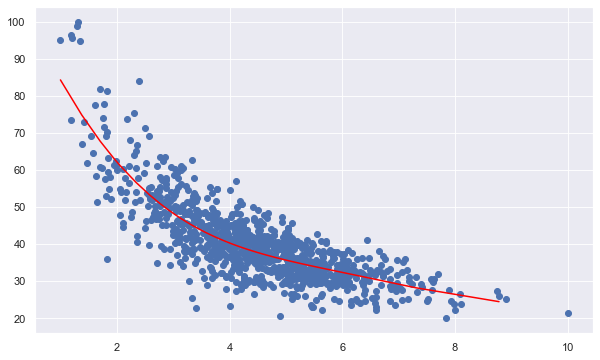

Ecuación: 
-49.99370127037626X + 5.652485651882596 X^2 + -0.14461531509095005 X^3 + 
-0.026495601405860086 X^4 + -0.0007511231574042377 X^5 + 0.00011992573141802692 X^6 + 
1.6117543327236712e-05 X^7 + 5.015429839050688e-07 X^8 + -1.2983485989792866e-07 X^9 + 
-51.84207112316256
Error medio Absoluto (MAE): 4.389008965040924
Root Mean Squared Error: 5.481477002088909
r2_score 0.7690947865797877


In [64]:
poly_features = PolynomialFeatures(degree=9, include_bias=False)
X_poly_train = poly_features.fit_transform(np.array(X_train['Number of Units']).reshape(-1, 1))
X_poly_test = poly_features.fit_transform(np.array(X_test['Number of Units']).reshape(-1, 1))
lasso_reg = Lasso(alpha=0.001, tol=0.16, max_iter = 1000000) #modelo con intercepto incluido
scale_pipeline = Pipeline(steps = [('scale', StandardScaler())])  
columnasTransformer = ColumnTransformer(transformers = [('scale_pipeline', scale_pipeline, [0])],
                                                        remainder='passthrough')
pipeline_lasso = Pipeline(steps=[('ct', columnasTransformer), ('m', lasso_reg)])
y_predicted_lasso = pipeline_lasso.fit(X_poly_train, y_train).predict(X_poly_test)
df_plot = pd.DataFrame({'Number of Units': X_test['Number of Units'].to_list(),'y_pred': y_predicted_lasso})
plt.figure(figsize=(10, 6))
plt.scatter(X['Number of Units'],y)
df_sorted = df_plot.sort_values(by=['Number of Units'])
plt.plot(df_sorted['Number of Units'],df_sorted['y_pred'], c="red")
plt.show()
print('Ecuación: \n' + str(lasso_reg.coef_[0]) + 'X + ' + str(lasso_reg.coef_[1]) + ' X^2 + ' + str(lasso_reg.coef_[2]) + ' X^3 + \n' +str(lasso_reg.coef_[3]) + ' X^4 + ' +str(lasso_reg.coef_[4]) + ' X^5 + ' +str(lasso_reg.coef_[5]) + ' X^6 + \n' +str(lasso_reg.coef_[6]) + ' X^7 + ' +str(lasso_reg.coef_[7]) + ' X^8 + ' +str(lasso_reg.coef_[8]) + ' X^9 + \n' + str(lasso_reg.intercept_))
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_test, y_predicted_lasso)) #Error medio
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predicted_lasso))) #RMSE para regresiones lineales
print('r2_score',r2_score(y_test, y_predicted_lasso)) #R2 regresiones lineales

**Ridge**

c:\Users\matth\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=4.72056e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


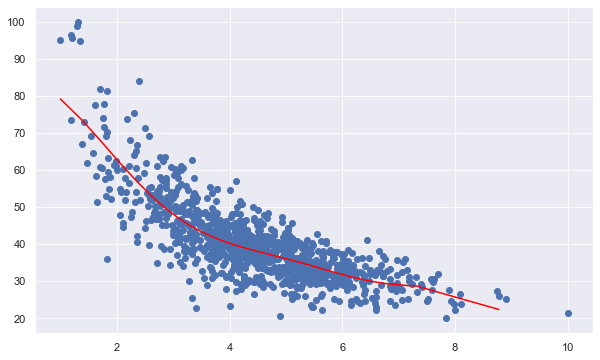

Ecuación: 
-1.870373822879442X + -4.299767784838328 X^2 + -2.8696703753681123 X^3 + 
1.5304449774120523 X^4 + -0.0570028268090403 X^5 + -0.07776194630625792 X^6 + 
0.016988327523054406 X^7 + -0.0014092321995705286 X^8 + 4.244734250453459e-05 X^9 + 
80.07650551704964
Error medio Absoluto (MAE): 4.440634310233633
Root Mean Squared Error: 5.593286988822495
r2_score 0.7595788043616919


In [65]:
poly_features = PolynomialFeatures(degree=9, include_bias=False)
X_poly_train = poly_features.fit_transform(np.array(X_train['Number of Units']).reshape(-1, 1))
X_poly_test = poly_features.fit_transform(np.array(X_test['Number of Units']).reshape(-1, 1))
ridge_reg = Ridge(alpha=10, tol=0.0001, max_iter = 10000) #modelo con intercepto incluido
scale_pipeline = Pipeline(steps = [('scale', StandardScaler())])  
columnasTransformer = ColumnTransformer(transformers = [('scale_pipeline', scale_pipeline, [0])],
                                                        remainder='passthrough')
pipeline_ridge = Pipeline(steps=[('ct', columnasTransformer), ('m', ridge_reg)])
y_predicted_ridge = pipeline_ridge.fit(X_poly_train, y_train).predict(X_poly_test)
df_plot = pd.DataFrame({'Number of Units': X_test['Number of Units'].to_list(),'y_pred': y_predicted_ridge})
plt.figure(figsize=(10, 6))
plt.scatter(X['Number of Units'],y)
df_sorted = df_plot.sort_values(by=['Number of Units'])
plt.plot(df_sorted['Number of Units'],df_sorted['y_pred'], c="red")
plt.show()
print('Ecuación: \n' + str(ridge_reg.coef_[0]) + 'X + ' + str(ridge_reg.coef_[1]) + ' X^2 + ' + str(ridge_reg.coef_[2]) + ' X^3 + \n' +str(ridge_reg.coef_[3]) + ' X^4 + ' +str(ridge_reg.coef_[4]) + ' X^5 + ' +str(ridge_reg.coef_[5]) + ' X^6 + \n' +str(ridge_reg.coef_[6]) + ' X^7 + ' +str(ridge_reg.coef_[7]) + ' X^8 + ' +str(ridge_reg.coef_[8]) + ' X^9 + \n' + str(ridge_reg.intercept_))
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_test, y_predicted_ridge)) #Error medio
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predicted_ridge))) #RMSE para regresiones lineales
print('r2_score',r2_score(y_test, y_predicted_ridge)) #R2 regresiones lineales

**Finalmente gráfica: MAE (de los cuatro métodos) y R2 (de los cuatro métodos).**

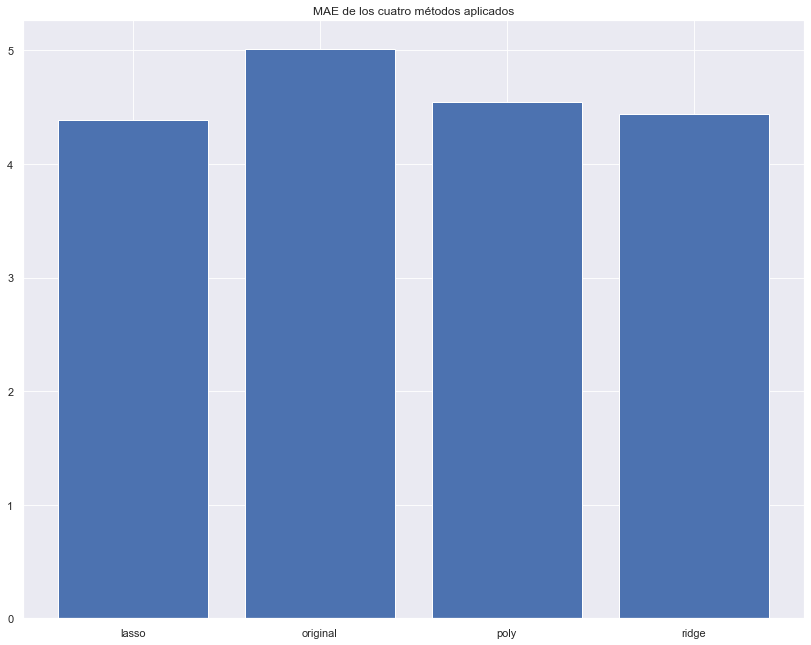

In [66]:
MAE_results = {}
MAE_results['original'] = metrics.mean_absolute_error(y_test, y_predicted_original)
MAE_results['poly'] = metrics.mean_absolute_error(y_test, y_predicted_poly)
MAE_results['ridge'] = metrics.mean_absolute_error(y_test, y_predicted_ridge)
MAE_results['lasso'] = metrics.mean_absolute_error(y_test, y_predicted_lasso)
lists = sorted(MAE_results.items())
x, y = zip(*lists)
plt.title('MAE de los cuatro métodos aplicados')
plt.bar(x, y)
plt.show()

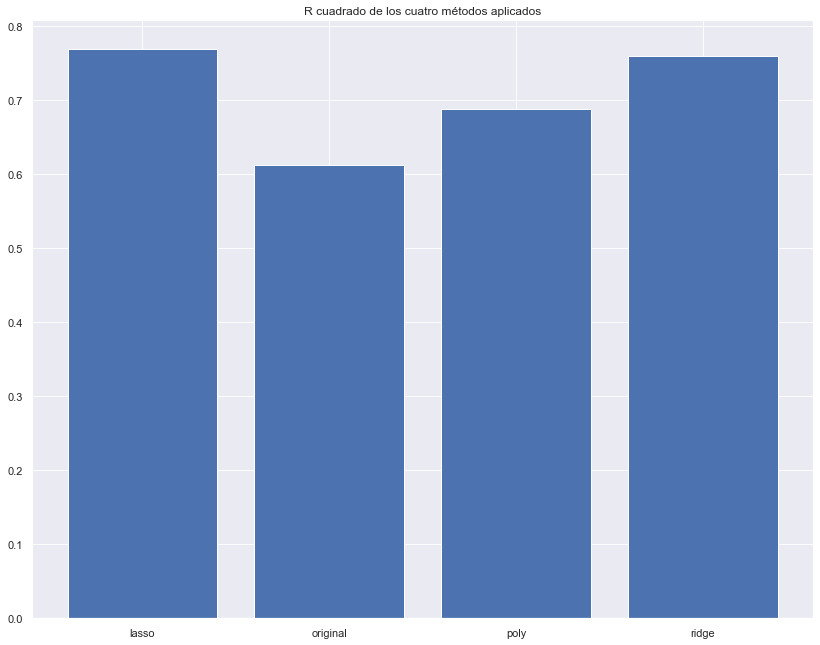

In [67]:
R2_results = {}
R2_results['original'] = r2_score(y_test, y_predicted_original)
R2_results['poly'] = r2_score(y_test, y_predicted_poly)
R2_results['ridge'] = r2_score(y_test, y_predicted_ridge)
R2_results['lasso'] = r2_score(y_test, y_predicted_lasso)
lists = sorted(R2_results.items())
x, y = zip(*lists)
plt.bar(x, y)
plt.title('R cuadrado de los cuatro métodos aplicados')
plt.show()

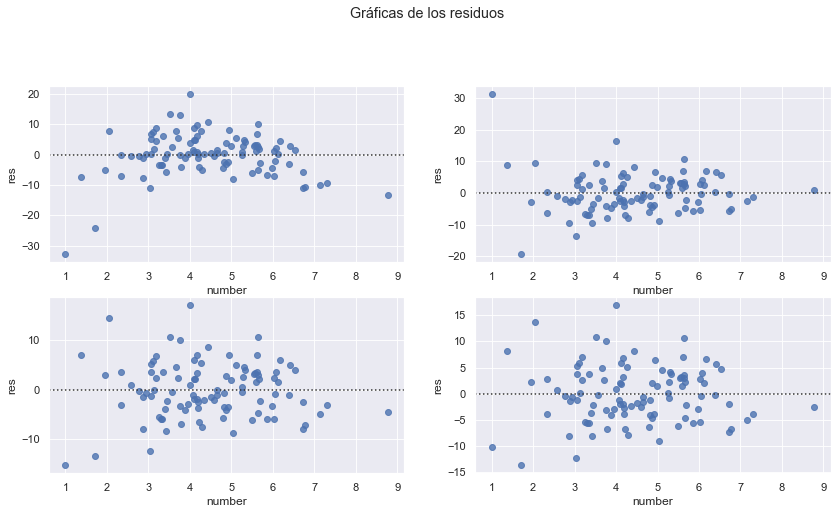

In [89]:
residuo_regresion_simple = y_predicted_original - y_test
residuo_regresion_poliforme = y_predicted_poly - y_test
residuo_ridge = y_predicted_ridge - y_test
residuo_lasso = y_predicted_lasso - y_test
lista_residuos = [residuo_regresion_simple,residuo_regresion_poliforme,residuo_ridge,residuo_lasso]
modelos_list = list(R2_results.keys())
sns.set(rc={'figure.figsize':(14,11)})
i = 0
fig, axes = plt.subplots(2, 2)    
for item in modelos_list:
  plt.subplot(3,2,i+1)   
  data = pd.DataFrame({'number': X_test['Number of Units'], 'res': lista_residuos[i]})
  i+=1
  sns.residplot(x='number', y='res',data=data)
plt.suptitle('Gráficas de los residuos')
plt.show()

#### **Explica tus resultados, que método se aproxima mejor, ¿por qué?, ¿qué porcentajes de entrenamiento y evaluación usaste? ¿Que error tienes?, ¿es bueno?, ¿Cómo lo sabes? Conclusiones.**

El método que se aproxima más es el polinomial con penalización Lasso. Veamos el modelo:

Ecuación: 
-49.99370127037626X + 5.652485651882596 X^2 + -0.14461531509095005 X^3 + 
-0.026495601405860086 X^4 + -0.0007511231574042377 X^5 + 0.00011992573141802692 X^6 + 
1.6117543327236712e-05 X^7 + 5.015429839050688e-07 X^8 + -1.2983485989792866e-07 X^9 + 
-51.84207112316256
Error medio Absoluto (MAE): 4.389008965040924
Root Mean Squared Error: 5.481477002088909
r2_score 0.7690947865797877

La penalización llevó casi a cero los valores superiores al grado 3 del polinomio y tiene el valor R2 más cercano a 1 de todos, lo cual lo hace el mejor candidato. También es el mejor candidato porque, al ver la data, se asemeja a un polinomio grado 2 o 3, por lo que tiene sentido. Este resultado se alcanzó con 10% de validación y el resto en entrenamiento. Esto es un buen error, por varias razones:

1. Está cercano a 1 el valor de R2.
2. Los residuos graficados se ven randomizados, lo cual indica un ajuste suficientemente del modelo.

### **Ejercicio 2. Regresión múltiple.**

In [99]:
df=pd.read_csv('casas.csv') #lo lei asi porque no conecta la URL del dataset, solo desde colab
df.head(5)

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


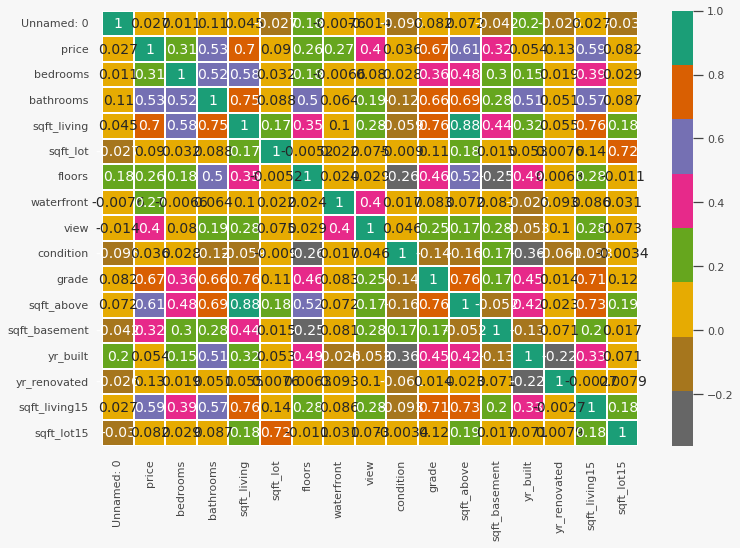

In [100]:
df.drop('id', axis = 1, inplace = True)
df.drop('date', axis = 1, inplace = True)
df.drop('zipcode', axis = 1, inplace = True)
df.drop('lat', axis = 1, inplace = True)
df.drop('long', axis = 1, inplace = True)
plt.figure(figsize=(12,8)) 
sns.heatmap(df.corr(), annot=True, cmap='Dark2_r', linewidths = 2)
plt.show()

In [101]:

columns = df.columns.drop('price')
features = columns
label = ['price']
X = df[features]
y = df[label]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 101)
print(f'Numero total de registros en la bdd: {len(X)}')
print("*****"*10)
print(f'Numero total de registros en el training set: {len(X_train)}')
print(f'Tamaño de X_train: {X_train.shape}')
print("*****"*10)
print(f'Mumero total de registros en el test dataset: {len(X_test)}')
print(f'Tamaño del X_test: {X_test.shape}')

Numero total de registros en la bdd: 21613
**************************************************
Numero total de registros en el training set: 19451
Tamaño de X_train: (19451, 16)
**************************************************
Mumero total de registros en el test dataset: 2162
Tamaño del X_test: (2162, 16)


### **Ejercicio 3: K-means.**

In [105]:
#pip install geopy

In [108]:
import pandas as pd
import numpy as np
from tqdm import tqdm
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point
%matplotlib inline
import qeds
qeds.themes.mpl_style();

In [109]:
url="https://raw.githubusercontent.com/marypazrf/bdd/main/target-locations.csv"
df=pd.read_csv(url)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='longitude', ylabel='latitude'>

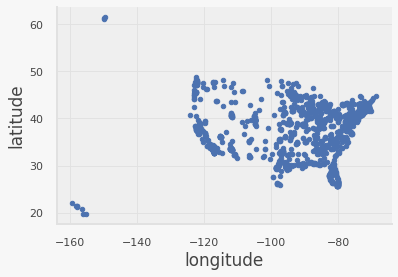

In [110]:
localizacion=df[["latitude","longitude"]]
localizacion.plot.scatter( "longitude","latitude")

In [111]:
df["Coordinates"] = list(zip(df.longitude, df.latitude))
df["Coordinates"] = df["Coordinates"].apply(Point)
gdf = gpd.GeoDataFrame(df, geometry="Coordinates")
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world = world.set_index("iso_a3")

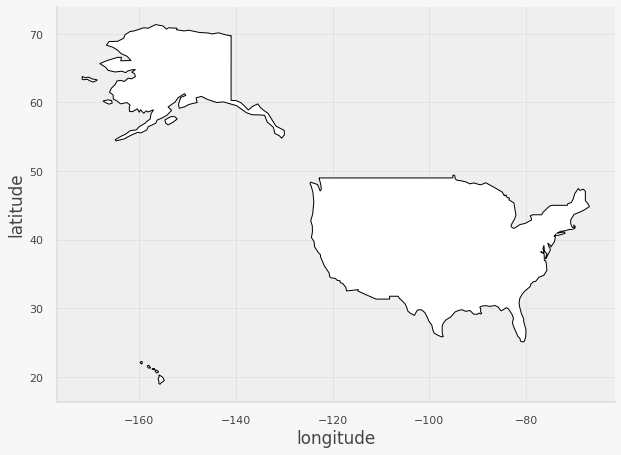

In [112]:
fig, gax = plt.subplots(figsize=(10,10))
world.query("name == 'United States of America'").plot(ax=gax, edgecolor='black',color='white')
gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

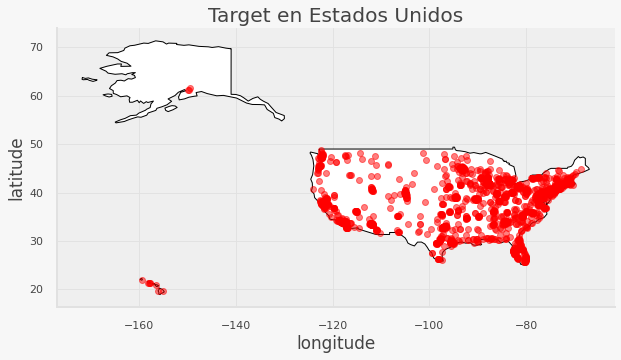

In [113]:
fig, gax = plt.subplots(figsize=(10,10))
world.query("name == 'United States of America'").plot(ax = gax, edgecolor='black', color='white')
gdf.plot(ax=gax, color='red', alpha = 0.5)
gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Target en Estados Unidos')
gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)
plt.show()

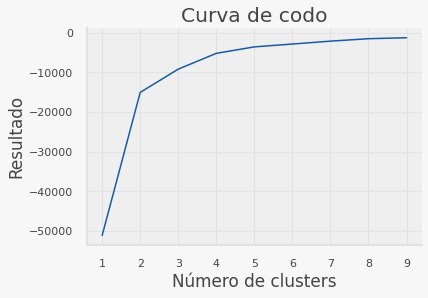

In [114]:
K_clusters = range(1,10)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]
Y_axis = localizacion[['latitude']]
X_axis = localizacion[['longitude']]
score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]
plt.plot(K_clusters, score)
plt.xlabel('Número de clusters')
plt.ylabel('Resultado')
plt.title('Curva de codo')
plt.show()

Escogí cuatro almacenes, donde vi la inflexión sin más retorno por nuevo cluster.

In [117]:
kmeans = KMeans(n_clusters = 4, init ='k-means++') #Aqui no creamos nuevos clusters, solamente re creamos 3, que son los que necesitamos
kmeans.fit(localizacion[localizacion.columns[0:2]])
labels = kmeans.labels_

In [119]:
localizacion=df[["longitude","latitude"]]
kmeans = KMeans(n_clusters=4).fit(localizacion)
centroids = kmeans.cluster_centers_
labels = kmeans.predict(localizacion)
C = kmeans.cluster_centers_
df_centers = pd.DataFrame(C)
df_centers["Coordinates"] = list(zip(df_centers[0], df_centers[1]))
df_centers["Coordinates"] = df_centers["Coordinates"].apply(Point)
geopandas_loc = gpd.GeoDataFrame(df_centers, geometry="Coordinates") 

In [135]:
from pandas.core.internals.concat import concat_arrays
coord_1 = str(geopandas_loc[1][0]) + ", " + str(geopandas_loc[0][0])
coord_2 = str(geopandas_loc[1][1]) + ", " + str(geopandas_loc[0][1])
coord_3 = str(geopandas_loc[1][2]) + ", " + str(geopandas_loc[0][2])
coord_4 = str(geopandas_loc[1][3]) + ", " + str(geopandas_loc[0][3])

In [136]:
from geopy.geocoders.yandex import Location
from geopy.geocoders import Nominatim 
from geopy.distance import geodesic

geolocator = Nominatim(user_agent="http")
localidades_tiendas = [coord_1, coord_2, coord_3, coord_4]

for i in localidades_tiendas:
  location = geolocator.reverse(i)
  print('Las localidades de las tiendas: ', location.address)

Las localidades de las tiendas:  Hazard Cave Trail, Pickett County, Tennessee, United States
Las localidades de las tiendas:  Mammoth Trail, Madera County, California, United States
Las localidades de las tiendas:  Diamond Street, Hilltown Township, Bucks County, Pennsylvania, 18962, United States
Las localidades de las tiendas:  322nd Road, Cowley County, Kansas, United States


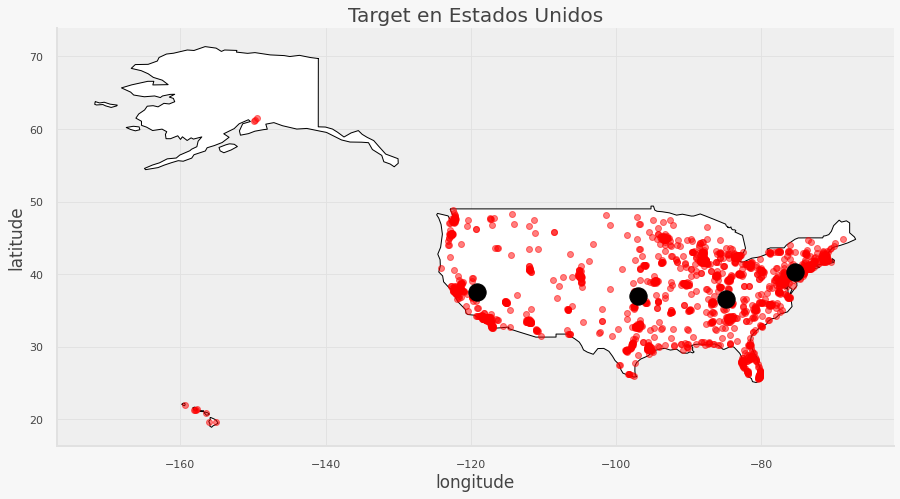

In [137]:
fig, gax = plt.subplots(figsize=(15,10))
world.query("name == 'United States of America'").plot(ax = gax, edgecolor='black', color='white')
gdf.plot(ax=gax, color='red', alpha = 0.5)
geopandas_loc.plot(ax=gax, color='black', alpha = 1, markersize = 300)
gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Target en Estados Unidos')
gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)
plt.show()

In [138]:
df_describe = pd.DataFrame(labels)
list(np.unique(df_describe.value_counts()))

[369, 401, 454, 615]

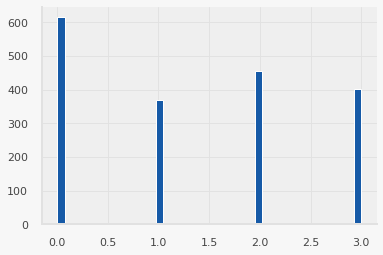

In [139]:
df_describe = pd.DataFrame(labels)
df_describe.describe()
plt.hist(labels, bins=40)   
plt.show()

#### **Encuentra el numero ideal de almacenes, justifica tu respuesta:**

#### **Encuentra las latitudes y longitudes de los almacenes, ¿qué ciudad es?, ¿a cuantas tiendas va surtir?, ¿sabes a que distancia estará?**

In [140]:
print('Las latitudes y longitudes de los almacenes: ')
geopandas_loc

Las latitudes y longitudes de los almacenes: 


,0,1,Coordinates
0,-84.802324,36.547679,POINT (-84.80232 36.54768)
1,-119.146456,37.577577,POINT (-119.14646 37.57758)
2,-75.275533,40.332247,POINT (-75.27553 40.33225)
3,-96.957199,37.008762,POINT (-96.95720 37.00876)


Las ciudades de las tiendas:

In [141]:
localidades_text = []
for i in localidades_tiendas:
  location = geolocator.reverse(i)
  print('Las localidades de las tiendas: ', location.address)
  localidades_text.append(location.address)

Las localidades de las tiendas:  Hazard Cave Trail, Pickett County, Tennessee, United States
Las localidades de las tiendas:  Mammoth Trail, Madera County, California, United States
Las localidades de las tiendas:  Diamond Street, Hilltown Township, Bucks County, Pennsylvania, 18962, United States
Las localidades de las tiendas:  322nd Road, Cowley County, Kansas, United States


A cuantas tiendas va a surtir:

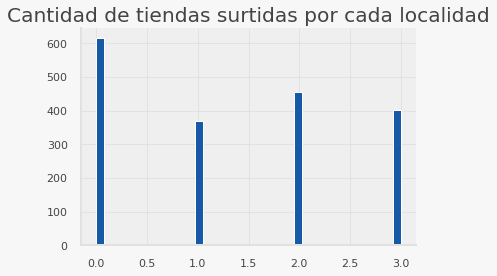

In [142]:
df_describe = pd.DataFrame(labels)
df_describe.describe()
plt.hist(labels, bins=40)  
plt.title('Cantidad de tiendas surtidas por cada localidad') 
plt.show()

Donde cada una es la siguiente:

In [143]:
localidades_text

['Hazard Cave Trail, Pickett County, Tennessee, United States',
 'Mammoth Trail, Madera County, California, United States',
 'Diamond Street, Hilltown Township, Bucks County, Pennsylvania, 18962, United States',
 '322nd Road, Cowley County, Kansas, United States']

Sabes a cuanta distancia estará:

In [145]:
d_1 = str(geodesic(coord_1, coord_1).miles)
d_2 = str(geodesic(coord_2, coord_2).miles)
d_3 = str(geodesic(coord_3, coord_3).miles)
print("Distancia entre t1 a t2", d_1, " millas") 
print("Distancia entre t2 a t3", d_1, " millas") 
print("Distancia entre t1 a t4", d_1, " millas") 


Distancia entre t1 a t2 0.0  millas
Distancia entre t2 a t3 0.0  millas
Distancia entre t1 a t4 0.0  millas


#### **¿Cómo elegiste el número de almacenes?, justifica tu respuesta técnicamente.**

Lo elegí usando la gráfica de elbow curve (curva de codo), viendo el punto de inflección donde ya no hace sentido agregar más clústeres al k-means. Acá, se corre dos riesgos: o escoger muy pocos centroides, o muchos. Si es muy pocos, no se tendrán bien las categorías. Si son muchos, no servirá la clasificación. 

#### **¿qué librerías nos pueden ayudar a graficar este tipo de datos?**

Las mejores librerías son las siguientes:

**Plotly**: Tiene muy buenas funciones de coloración dentro de los mapas, así como una gran cantidad de información recopilada. Además, ofrece una buena integración con los demás ambientes populares de Python.

**Gmplot**: Esta es muy útil porque permite generar el HTML y el javascript para hacer uso encima de Google Maps. Esta fácil integración hace que sea muy útil.

**Folium**: Librería que hace uso de las bondades de JavaScript para funcionar. Básicamente, permite visualizar la data como un mapa de Leaflet, lo cual hace que sea interactiva y efectiva.

#### **¿Consideras importante que se grafique en un mapa?, ¿por qué?**

Creo que es muy importante porque permite entender el valor de la data con un vistazo. Esto es equivalente a 'graficar' datos numéricos, pues agregan nueva información visual que, de otra manera, sería más difícil de comprender al momento de explorar los datos.

#### **Conclusiones**

1. Se encontró que cuatro tiendas es lo más conveniente de colocar.
2. Las tiendas estarán localizadas en 'Hazard Cave Trail, Pickett County, Tennessee, United States',
 'Mammoth Trail, Madera County, California, United States',
 'Diamond Street, Hilltown Township, Bucks County, Pennsylvania, 18962, United States',
 '322nd Road, Cowley County, Kansas, United States'.

3. Los datos atípicos en una aplicación de geolocalización no necesariamente son malos, pues pueden representar datos válidos al cruzarlos con un mapa visual.